<a href="https://colab.research.google.com/github/PrawinSankar777/Machine-Learning/blob/master/Linear_Regression_Boston_Housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Function Initialization

In [ ]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

In [ ]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
features = pd.DataFrame(boston.data,columns = boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [ ]:
target = pd.DataFrame(boston.target,columns = ['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
max(target['target'])

50.0

In [ ]:
min(target['target'])

5.0

In [ ]:
df = pd.concat((features,target),axis = 1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Use describe() to generate a summary of the dataset**

In [ ]:
#Using rounding off of decimals(2 places)to set the precision
df.describe().round(decimals = 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


**Correlation between Attributes and Target Variables**

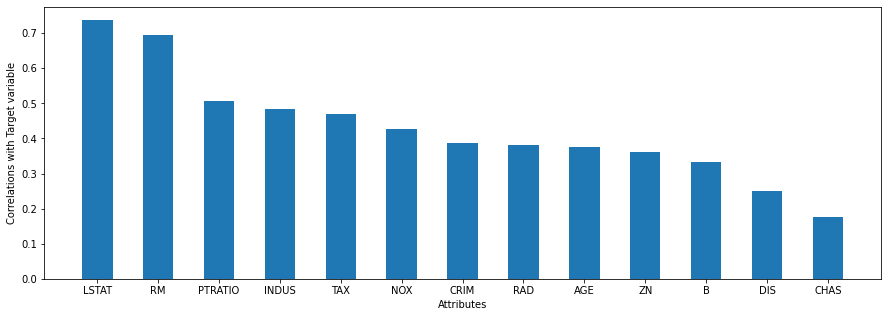

In [ ]:
#calculate correlation between every column on the data 
corr  = df.corr('pearson')

#Take absolute valuea of correlations
corrs = [abs(corr[attr]['target']) for attr in list(features)]

#Make a list of pairs [(corr, feature)]
l = list(zip(corrs, list(features)))

#Sort the list of pairs in reverse/descending order,
#with the correlation value as the key for sorting 
l.sort(key = lambda x : x[0], reverse=True)


#Unzip pairs to two lists
#zip(*l) - takes a list that looks like [[a,b,c], [d,e,f], [g,h,i]]
#and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs, labels = list(zip((*l)))
        
#Plot correlations w.r.t. target variable as bar graph
import numpy as np
index = np.arange(len(labels))

plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlations with Target variable')
plt.xticks(index, labels)
plt.show()

From the above bar graph we can observe that LSTAT and RAM have two highest absolute correlation values

<h2>`Normalizing the Data<h2>

In [ ]:
x = df['LSTAT'].values
Y = df['target'].values

In [ ]:
#Before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [ ]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(x.reshape(-1,1))
X = X[:, -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1, 1))
Y = Y[:, -1]

In [ ]:
#After normalization
print(Y[:5])


[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


<h2>Defining Error<h2>

**MSE - Mean Squared Error**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

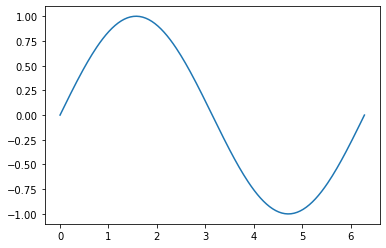

In [ ]:
# Generate n evenly spaced values from zero radians to 2PI radians
n = 200
x = np.linspace(0, 2 * np.pi, n)
sine_values = np.sin(x)

#plotting sine wave
plt.plot(x, sine_values)


# Add some noise to the sine wave


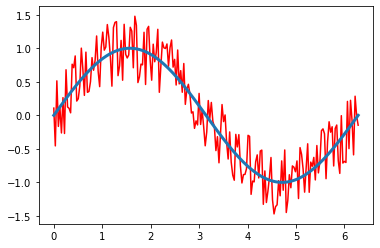

In [ ]:
noise = 0.5 
noisy_sine_values = sine_values + np.random.uniform(-noise, noise, n)

#Plot the noisy values
plt.plot(x, noisy_sine_values, color='r')
plt.plot(x, sine_values, linewidth=3)

In [ ]:
#calc MSE using function from sklearn library
mean_squared_error(sine_values, noisy_sine_values)

0.08940732518757459

In [ ]:
#Calc MSE using the equation
error_value = (1/n) * sum(np.power(sine_values  - noisy_sine_values, 2))
error_value

0.08940732518757459

In [ ]:
def error(m, x, c, t):
    N = x.size
    e = sum(((m * x + c) - t) ** 2)
    return e * 1/(2 * N)
    

# Splitting the dataset


Splitting data into fixed sets

In [ ]:
#0.2 indicates 20% of the data is randomly sampled as testing data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)



Update Function

In [ ]:
def update (m, x, c, t, learning_rate):##updating the update function
    grad_m = sum(2 * ((m * x + c) -t) * x)
    grad_c = sum(2 * ((m * x + c) -t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

**Error Threshold** : If the error falls below the threshold, the gradient descent process is stopped and the weights are returned.

Gradient Descent Function

In [ ]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values  = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print('Error less than the threshold. Stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m,c))
    return m, c, error_values, mc_values

*#magic function to identify the time of execution*



In [ ]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)


CPU times: user 62.3 ms, sys: 1.7 ms, total: 64 ms
Wall time: 64.6 ms


In [ ]:
print(m,c)

-0.7699103418190527 0.6207227268250588


*Animating the model visualisation*

In [ ]:
#As the number of iterations increases, changes in the line are less noticeable. 
#Inorder to reduce the processing time for animation, it is prefered to choose small
mc_values_anim = mc_values[0:250:5]

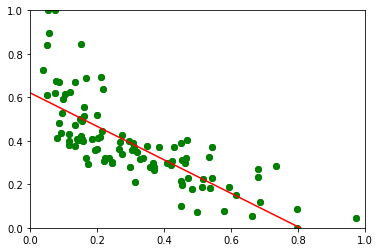

In [ ]:
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro-', animated = True)

def init():
    plt.scatter(xtest, ytest, color = 'g')
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 1.0)
    return ln,

def update_frame(frame):
    m, c = mc_values_anim[frame]
    x1, y1 = -0.5, m * -.5 + c
    x2, y2 = 1.5, m * 1.5 + c
    ln.set_data([x1, x2], [y1, y2])
    return ln,

anim = FuncAnimation(fig, update_frame, frames = range(len(mc_values_anim)),
                                init_func = init, blit = True)
HTML(anim.to_html5_video())

<h2>Error Visualization</h2>

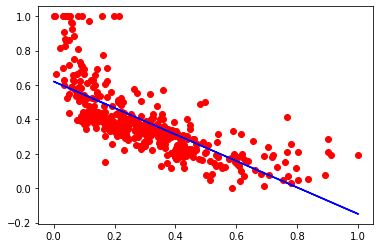

In [ ]:
plt.scatter(xtrain,ytrain,color = "r")
plt.plot(xtrain,(m*xtrain+c),color = 'b')

<h2>Plotting error values</h2>


Text(0.5, 0, 'Iterations')

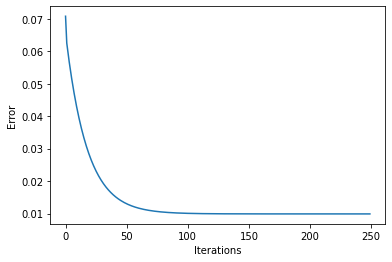

In [ ]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')


# Prediction


In [ ]:
#  Calculate the predictions on the test set as a vectorized operation
predicted = (m * xtest) + c


In [ ]:
# Compute MSE for the predicted valus on testing_set
mean_squared_error(ytest, predicted)

0.01601048093116738

# Put xtest, ytest and predicted values into a single DataFrame so that we
# can see the predicted values alongside testing set
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns = ['x', 'target_y', 'predictions'] )

In [ ]:
# Put xtest, ytest and predicted values into a single DataFrame so that we
# can see the predicted values alongside testing set
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns = ['x', 'target_y', 'predicted_y'] )
p.head()

,x,target_y,predicted_y
0,0.323124,0.222222,0.368816
1,0.161976,0.557778,0.488818
2,0.178532,0.377778,0.476489
3,0.220199,0.482222,0.445461
4,0.174393,0.293333,0.479571


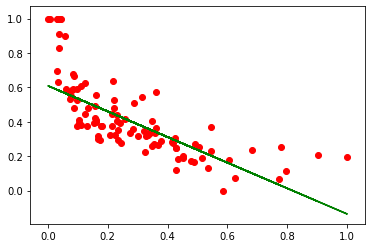

In [ ]:
plt.scatter(xtest, ytest, color = 'r')
plt.plot(xtest,predicted,color = 'g')

In [ ]:
predicted = predicted.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)
xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)
p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)),
                 columns = ['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,predicted_y
0,[13.44],[15.000000000000002],[21.59672291764394]
1,[7.6],[30.1],[26.996811080953233]
2,[8.2],[22.0],[26.442007502531045]
3,[9.71],[26.7],[25.04575183016854]
4,[8.05],[18.2],[26.580708397136593]


<h1>Plot the predicted values against the Target values</h1>

<h2>1. Predicted values are represented by red colored line.</h2>
<h2>2.Target values are represenetd by blue colored points</h2>


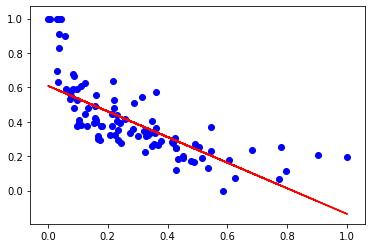

In [ ]:
plt.scatter(xtest, ytest, color = 'b')
plt.plot(xtest, predicted, color = 'r')

<h2>Reverting normalization to obtain the predicted price of the houses in $1000s</h2>

In [ ]:
# Reshape to change the shape to the shape that is required by the scaler
predicted = predicted.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)
xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)

predicted_scaled = y_scaler.inverse_transform(predicted)

# This is to remove the extra dimensions
xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted[:, -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns = ['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()


,x,target_y,predicted_y
0,13.44,15.0,0.37
1,7.60,30.1,0.49
2,8.20,22.0,0.48
3,9.71,26.7,0.45
4,8.05,18.2,0.48
